# Predicción de Calidad del Vino (Core)

### Objetivo

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

### Dataset: Wine Quality Dataset

Descripción del Dataset: Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

### Instrucciones:

 1. **Carga y Exploración de Datos:**

    * Cargar el dataset y revisar su estructura básica.
    * Describir las variables y su distribución.
    * Identificar y tratar valores nulos y outliers.


 2. **Preprocesamiento de Datos:**

    * Seleccionar características importantes para la clasificación.
    * Transformar variables categóricas en variables numéricas si es necesario.
    * Dividir los datos en conjuntos de entrenamiento y prueba.
    * Escalar las características.


 3. **Entrenamiento de Modelos de Clasificación:**

    * Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
    * Utilizar validación cruzada para seleccionar los mejores hiperparámetros.


 4. **Evaluación de Modelos:**

    * Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
    * Generar un informe de clasificación para cada modelo.
    * Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.


 5. **Análisis y Comparación de Resultados:**

    * Comparar el rendimiento de los diferentes modelos.
    * Discutir cuál modelo ofrece el mejor rendimiento y por qué.
    * Identificar las fortalezas y debilidades de cada enfoque en este contexto.


 6. **Repositorio en GitHub:**

    * Crear un repositorio en GitHub con el código y los resultados del análisis.
    * Crear un tag de liberación con una breve descripción de la versión final del proyecto.

**Adicional:**

* Añadir un archivo README.md en el repositorio de GitHub que explique el propósito del proyecto, las técnicas utilizadas y cómo ejecutar el código.
* Incluir una presentación o informe detallado en formato PDF con todos los hallazgos y conclusiones del análisis.


**Nota:** Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento, la selección de modelos y la evaluación de los resultados. Esto proporcionará una visión completa y estructurada del trabajo realizado.

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


### **Exploratory Data Analisys**

Cargar el dataset y revisar la estructura basica

In [163]:
data = pd.read_csv('../Data/WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [164]:
data = data.drop('Id', axis=1) #Eliminamos la columna Id porque no sirve de nada

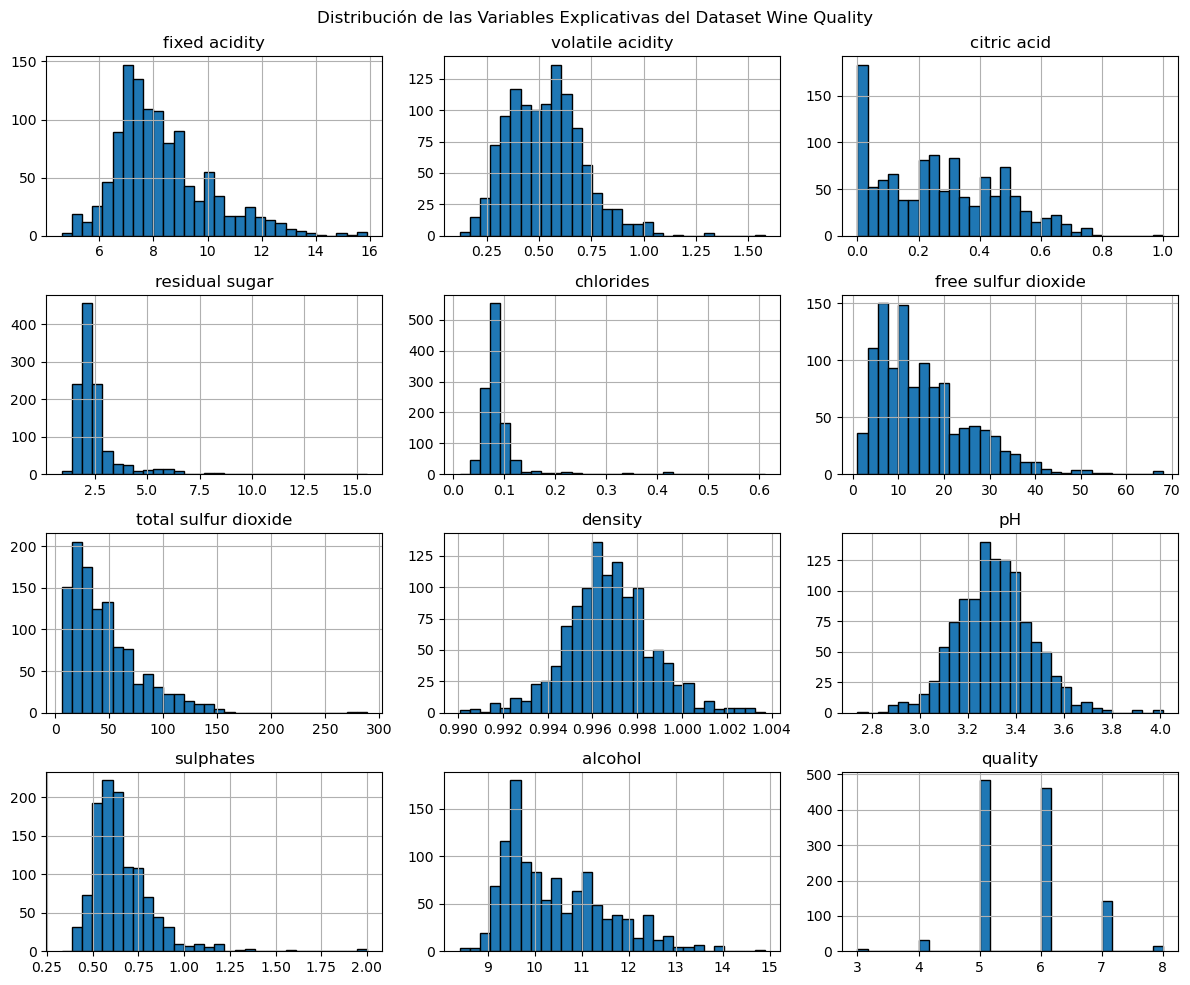

In [165]:
# Crear histogramas para cada característica
data.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset Wine Quality')
plt.tight_layout()
plt.show()

Fixed Acidity: La distribución tiene un claro pico alrededor de valores de 6-7, lo que indica que la mayoría de los vinos presentan estos niveles de acidez fija. La distribución está sesgada, con una cola más larga hacia niveles de acidez más altos.

Volatile Acidity: Esta variable tiene una distribución más dispersa, con un pico principal alrededor de 0.5-0.6 y valores que llegan hasta aproximadamente 1.4, lo que sugiere que la acidez volátil varía de manera más significativa entre las muestras de vino.

Citric Acid: La distribución del ácido cítrico muestra un pico distintivo centrado alrededor de 0.5, con valores que van desde 0 hasta casi 1.0.

Residual Sugar: Esta variable presenta una distribución altamente asimétrica, con la mayoría de los valores entre 0-5 pero algunos extendiéndose hasta 15, lo que indica una amplia gama en el contenido de azúcar residual entre las muestras de vino.

Chlorides: La distribución de los cloruros está sesgada a la derecha, con un pico alrededor de 0.1 y valores que alcanzan aproximadamente 0.4-0.5, lo que sugiere que la mayoría de los vinos tienen niveles de cloruros relativamente bajos.

Density:  La distribución de la densidad está centrada alrededor de 0.996-0.998, con un rango de valores estrecho en general.

Alcohol: El contenido de alcohol exhibe una distribución en forma de campana, con un pico alrededor de 12.5-13% de alcohol por volumen.

pH: Los valores de pH siguen una distribución sesgada a la izquierda, con una moda alrededor de 3.3 y un rango que va de aproximadamente 2.8 a 4.0.

Free Sulfur Dioxide: Esta variable muestra una distribución altamente sesgada a la derecha, con la mayoría de los valores por debajo de 40 mg/L y algunos valores atípicos que llegan hasta 70 mg/L.

Sulfates: La distribución de sulfatos también está sesgada a la derecha, con un pico alrededor de 0.5-0.6 g/dm3 y valores que van desde 0.25 hasta aproximadamente 2.0 g/dm3.

Quality: Los puntajes de calidad exhiben una distribución bimodal, con dos picos distintos alrededor de 5 y 6, lo que sugiere una polarización entre vinos de menor y mayor calidad en el conjunto de datos.

In [166]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

In [167]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in numerical_cols:
    datos_columna = data[columna].values
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
fixed acidity,1143.0,8.31,7.90,1.75,4.60,15.90,7.10,9.10
volatile acidity,1143.0,0.53,0.52,0.18,0.12,1.58,0.39,0.64
citric acid,1143.0,0.27,0.25,0.20,0.00,1.00,0.09,0.42
residual sugar,1143.0,2.53,2.20,1.36,0.90,15.50,1.90,2.60
chlorides,1143.0,0.09,0.08,0.05,0.01,0.61,0.07,0.09
free sulfur dioxide,1143.0,15.62,13.00,10.25,1.00,68.00,7.00,21.00
total sulfur dioxide,1143.0,45.91,37.00,32.78,6.00,289.00,21.00,61.00
density,1143.0,1.00,1.00,0.00,0.99,1.00,1.00,1.00
pH,1143.0,3.31,3.31,0.16,2.74,4.01,3.20,3.40
sulphates,1143.0,0.66,0.62,0.17,0.33,2.00,0.55,0.73


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


Identificar y tratar valores nulos y outliers

In [169]:
utils.calculate_na_statistics(data)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,1143,0,0.0
volatile acidity,1143,0,0.0
citric acid,1143,0,0.0
residual sugar,1143,0,0.0
chlorides,1143,0,0.0
free sulfur dioxide,1143,0,0.0
total sulfur dioxide,1143,0,0.0
density,1143,0,0.0
pH,1143,0,0.0
sulphates,1143,0,0.0


In [170]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(data[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data[column][~outliers].min(),
        'Upper Bound': data[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
fixed acidity,44.0,3.849519,4.6000,12.000
volatile acidity,14.0,1.224847,0.1200,1.005
citric acid,1.0,0.087489,0.0000,0.790
residual sugar,110.0,9.623797,0.9000,3.650
chlorides,77.0,6.736658,0.0410,0.119
free sulfur dioxide,18.0,1.574803,1.0000,42.000
total sulfur dioxide,40.0,3.499563,6.0000,121.000
density,36.0,3.149606,0.9922,1.001
pH,20.0,1.749781,2.9200,3.690
sulphates,43.0,3.762030,0.3300,0.990


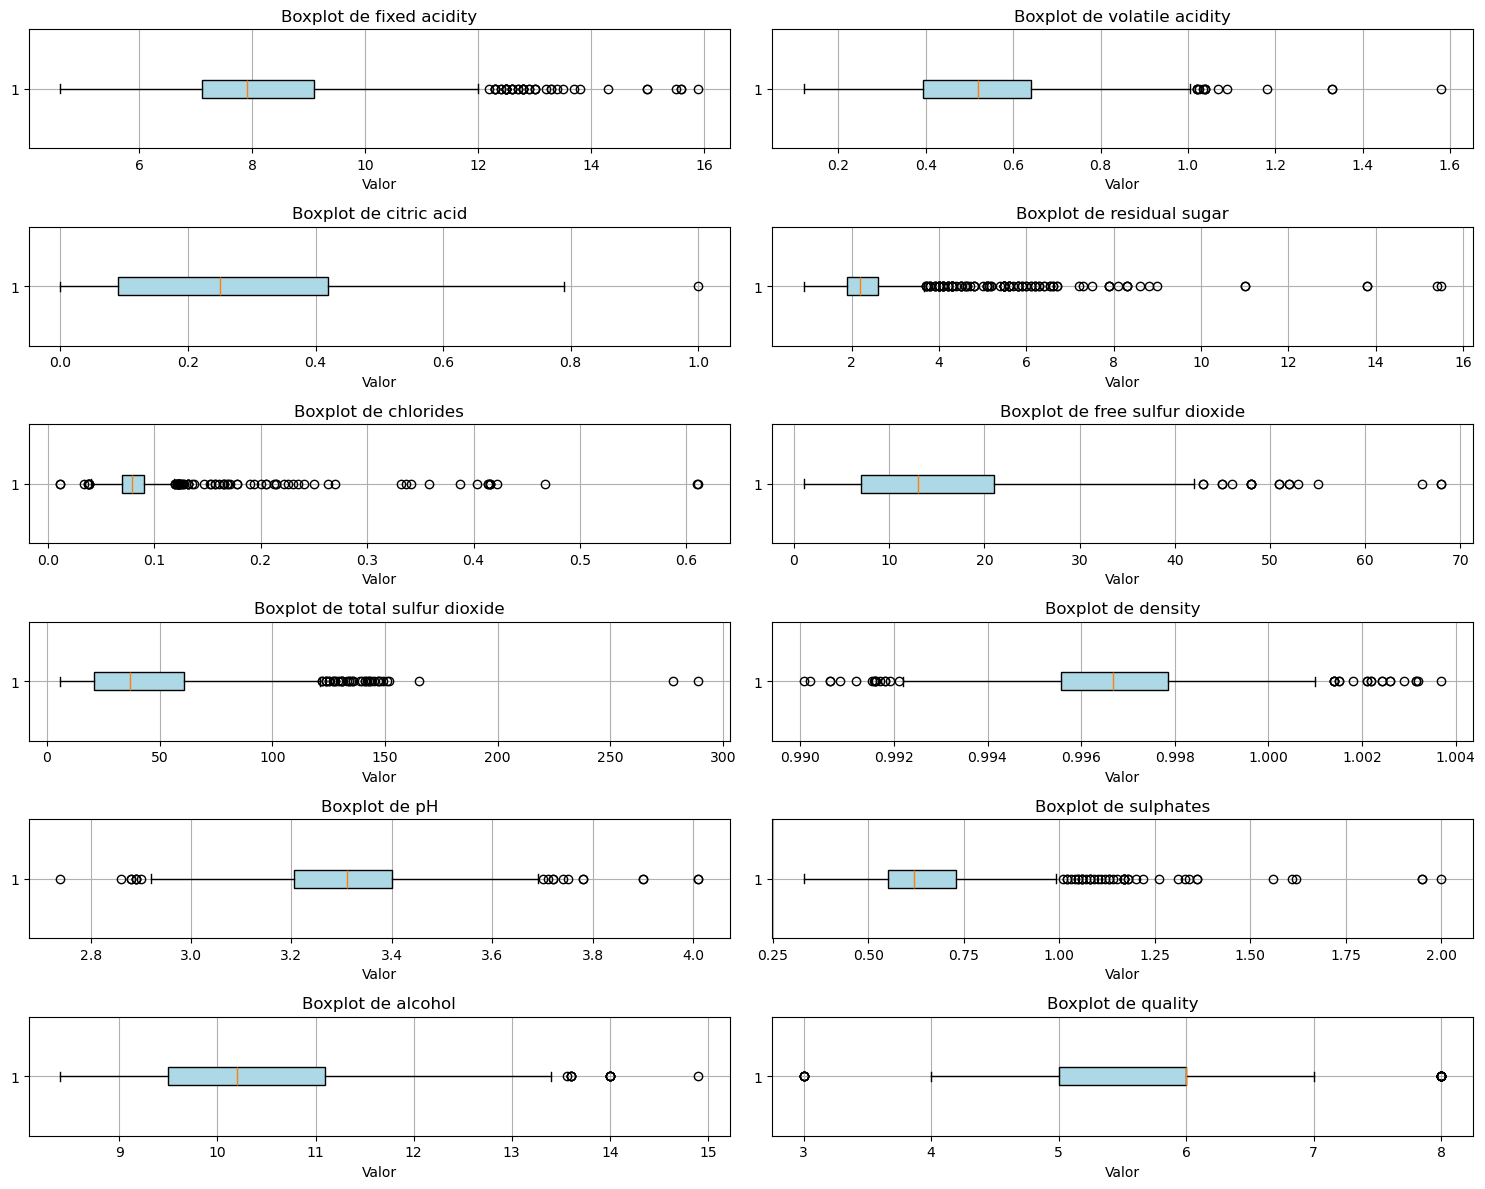

In [171]:
# Crear gráficos de boxplot separados para cada característica
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Graficar cada variable en un boxplot separado
for i, col in enumerate(data.columns):
    axes[i].boxplot(data[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('Valor')
    axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()

Las distribuciones de acidez fija, ácido cítrico y densidad parecen relativamente simétricas y centradas alrededor de un valor mediano claro.

La acidez volátil, el azúcar residual y el dióxido de azufre libre/total muestran distribuciones más sesgadas con colas más largas.

Los valores de pH muestran una distribución sesgada hacia la izquierda, mientras que el contenido de alcohol sigue una curva más en forma de campana.

Los puntajes de calidad muestran una distribución bimodal, lo que indica una polarización de vinos de menor y mayor calidad en el conjunto de datos.

**Resolucion**

Después de revisar los diagramas de caja y contar los valores atípicos, he decidido no imputar ningún dato.

Esta decisión se basa en el principio de mantener la integridad de los datos originales y evitar posibles problemas que podrían surgir de la imputación. 

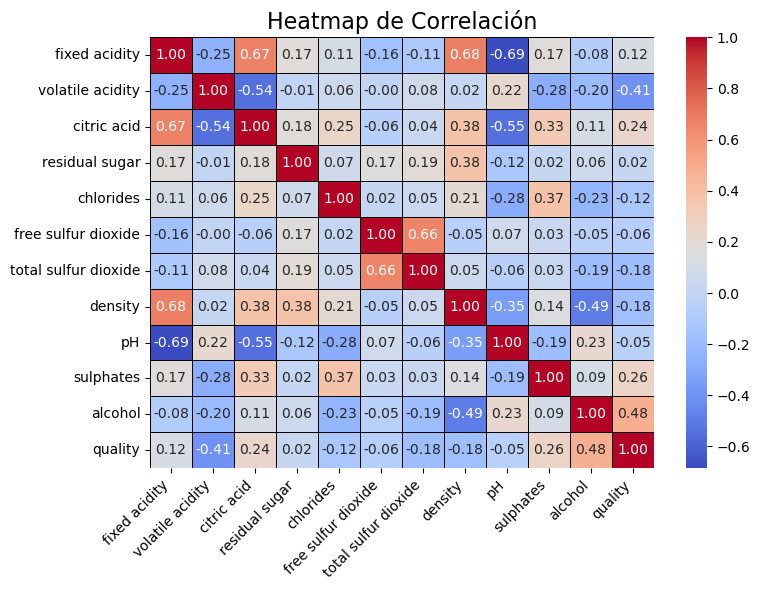

In [172]:
# Crear la figura y el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True  ,fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black')

# Agregar título y ajustar el diseño
plt.title('Heatmap de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.tight_layout
plt.show()


Text(0, 0.5, 'Features')

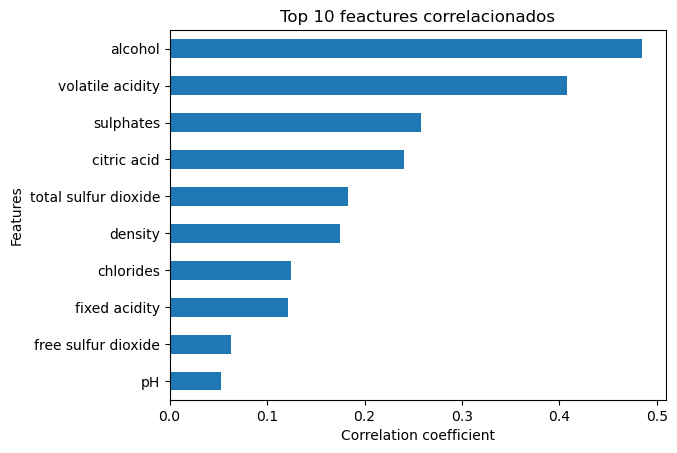

In [173]:
plt.figure()
data.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh') 
plt.title("Top 10 feactures correlacionados")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

La acidez fija tiene una fuerte correlación positiva (0,67) con el ácido cítrico y una correlación negativa moderada (-0,69) con el pH.

La acidez volátil tiene una fuerte correlación positiva (1,00) consigo misma y correlaciones negativas moderadas con el alcohol (-0,41) y la calidad (-0,41).

Los cloruros muestran una fuerte correlación positiva (1,00) consigo mismos y correlaciones negativas moderadas con la densidad (-0,49) y la calidad (-0,23).

El alcohol tiene una fuerte correlación positiva (1,00) consigo mismo y una correlación positiva moderada (0,48) con la calidad.

La variable calidad tiene una fuerte correlación positiva (1,00) consigo misma, y ​​correlaciones positivas moderadas con el alcohol (0,48) y el ácido cítrico (0,24).

### **Modeling**

Seleccionar las caracteristicas importantes para la clasificacion

In [174]:
X = data.drop(columns=['quality'])  # Asumiendo que el DataFrame se llama 'data'
y = data['quality']

Dividir los datos en conjunto de entrenamiento y prueba

In [175]:

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Verificamos la cantidad de datos cargados

In [176]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (857, 11)
X Test  :  (286, 11)
Y Train :  (857,)
Y Test  :  (286,)


Escalar las caracteristicas

In [177]:
#Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **KNN**

In [178]:
# Definir las columnas numéricas y categóricas
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
categorical_features = ['quality']  # No hay características categóricas en este caso

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

# Crear el Pipeline para el modelo KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

In [179]:
# Ajustar el modelo KNN
knn_pipeline.fit(X_train, y_train)

# Hacer predicciones y calcular la precisión
y_pred_knn = knn_pipeline.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Precisión del modelo KNN: {accuracy_knn:.2f}")
print('------------------------------------------')
print('Reporte de Clasificacion')
print(classification_report(y_test, y_pred_knn,zero_division=0))

Precisión del modelo KNN: 0.54
------------------------------------------
Reporte de Clasificacion
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.59      0.70      0.64       121
           6       0.52      0.49      0.50       121
           7       0.43      0.29      0.35        34
           8       0.00      0.00      0.00         3

    accuracy                           0.54       286
   macro avg       0.31      0.30      0.30       286
weighted avg       0.52      0.54      0.52       286



Los resultados del modelo KNN muestran una precisión general relativamente baja de 0,56 o 56 %. El informe de clasificación proporciona métricas de rendimiento más detalladas:

El modelo tiene un rendimiento deficiente en las clases minoritarias, con un 0 % de precisión y recuperación para las clases 4 y 8. Esto indica que el modelo tiene dificultades para identificar correctamente estas clases de calidad de vino menos comunes.

Para las clases más comunes 5, 6 y 7, los valores de precisión y recuperación varían de 0,44 a 0,61, lo que sugiere un rendimiento moderado.

Las puntuaciones F1, que equilibran la precisión y la recuperación, también están en el lado inferior, oscilando entre 0,33 y 0,64.

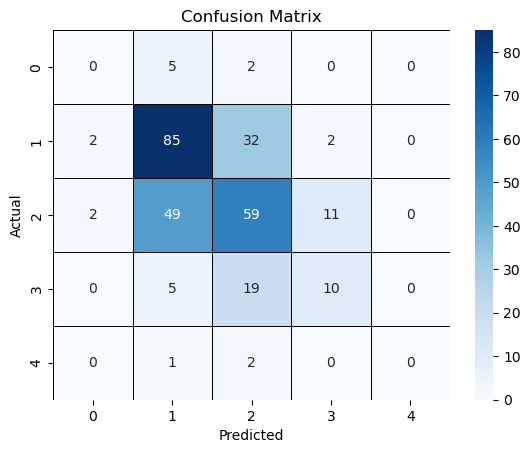

In [180]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure()
sns.heatmap(conf_matrix, linecolor='black',linewidths=0.5, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


El modelo predijo correctamente 66 instancias para la clase 1.

Hay mayores errores de clasificación entre las clases 1 y 2, así como entre 2 y 3.

El modelo tiene dificultades para predecir con precisión las clases 0 y 4, con valores bajos en la diagonal.

c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


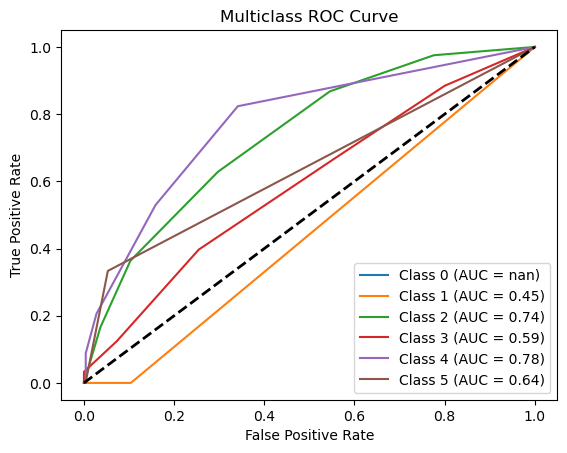

In [181]:
# Binarizar las etiquetas de la clase
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Entrenar el modelo con OneVsRest para probabilidades multiclase
knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn_ovr.fit(X_train, label_binarize(y_train, classes=np.unique(y)))
y_score = knn_ovr.predict_proba(X_test)

# Calcular ROC y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

plt.figure()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


Este análisis sugiere que, si bien el modelo KNN es parcialmente eficaz para predecir ciertos niveles de calidad del vino, su desempeño probablemente podría mejorarse, posiblemente ajustando los hiperparámetros, utilizando un algoritmo de clasificación diferente o empleando técnicas para manejar el desequilibrio de clases.

#### **Random Forest**

In [182]:
# Definir las columnas numéricas y categóricas
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
categorical_features = ['quality']  # No hay características categóricas en este caso

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

# Crear el Pipeline para el modelo KNN
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [183]:
# Ajustar el modelo Random Forest
rf_pipeline.fit(X_train, y_train)

# Hacer predicciones y calcular la precisión
y_pred_rf = rf_pipeline.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del modelo Random Forest: {accuracy_rf:.2f}")
print('------------------------------------------')
print('Reporte de Clasificacion')
print(classification_report(y_test, y_pred_rf, zero_division=0))

Precisión del modelo Random Forest: 0.67
------------------------------------------
Reporte de Clasificacion
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.70      0.74      0.72       121
           6       0.63      0.67      0.65       121
           7       0.72      0.62      0.67        34
           8       0.00      0.00      0.00         3

    accuracy                           0.67       286
   macro avg       0.41      0.41      0.41       286
weighted avg       0.65      0.67      0.66       286



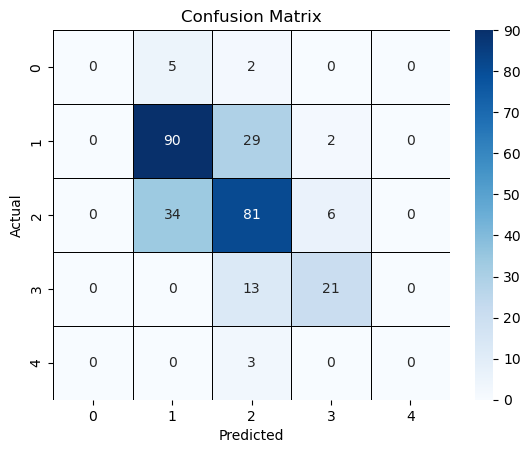

In [184]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure()
sns.heatmap(conf_matrix, linecolor='black',linewidths=0.5, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


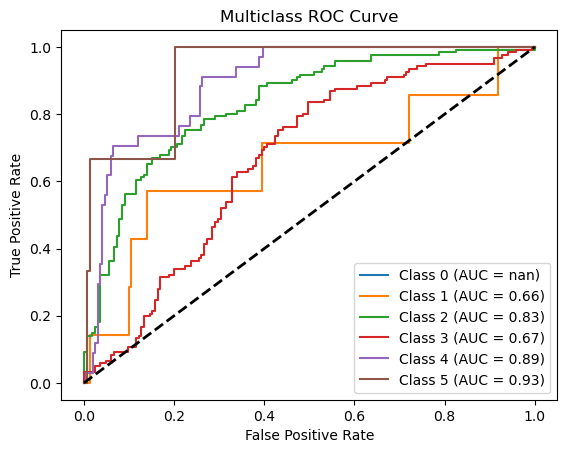

In [185]:
# Binarizar las etiquetas de la clase
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Entrenar el modelo con OneVsRest para probabilidades multiclase
lg_ovr = OneVsRestClassifier(LogisticRegression(max_iter=10000))
lg_ovr.fit(X_train, label_binarize(y_train, classes=np.unique(y)))
y_score = lg_ovr.predict_proba(X_test)

# Calcular ROC y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

plt.figure()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


#### **Logistic Regression**

In [186]:
# Definir las columnas numéricas y categóricas
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
categorical_features = []  # No hay características categóricas en este caso

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

# Crear un Pipeline completo
lg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

In [187]:
# Ajustar el Pipeline a los datos de entrenamiento
lg_pipeline.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_lg = lg_pipeline.predict(X_test)

# Calcular la precisión del modelo
accuracy_lg = accuracy_score(y_test, y_pred_lg)
print(f"Precisión del modelo LogisticRegression: {accuracy_lg:.2f}")
print('------------------------------------------')
print('Reporte de Clasificacion')
print(classification_report(y_test, y_pred_lg, zero_division=0))


Precisión del modelo LogisticRegression: 0.64
------------------------------------------
Reporte de Clasificacion
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         7
           5       0.69      0.73      0.71       121
           6       0.61      0.65      0.63       121
           7       0.56      0.44      0.49        34
           8       0.00      0.00      0.00         3

    accuracy                           0.64       286
   macro avg       0.31      0.30      0.30       286
weighted avg       0.61      0.64      0.62       286



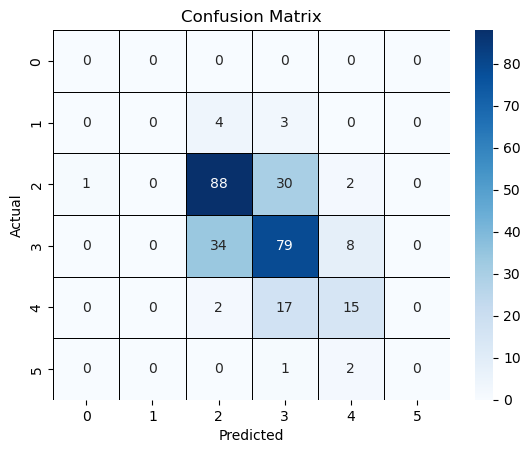

In [188]:
conf_matrix = confusion_matrix(y_test, y_pred_lg)
plt.figure()
sns.heatmap(conf_matrix, linecolor='black',linewidths=0.5, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


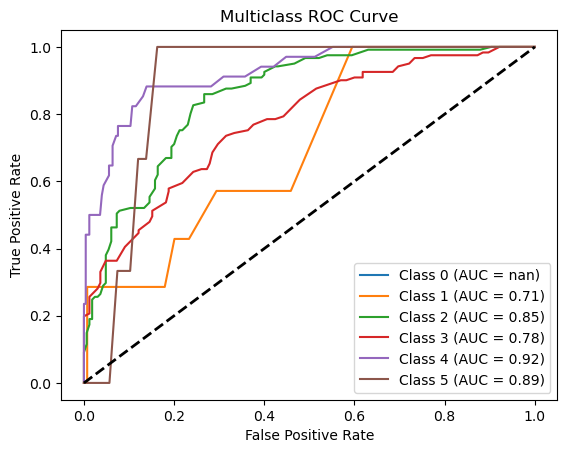

In [189]:
# Binarizar las etiquetas de la clase
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Entrenar el modelo con OneVsRest para probabilidades multiclase
rf_ovr = OneVsRestClassifier(RandomForestClassifier())
rf_ovr.fit(X_train, label_binarize(y_train, classes=np.unique(y)))
y_score = rf_ovr.predict_proba(X_test)

# Calcular ROC y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

plt.figure()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


### **Conclusiones**

El modelo Random Forest muestra el mejor rendimiento general con una precisión del 67% y valores superiores de f1-score para las clases mayoritarias (5, 6 y 7), lo que indica un buen balance entre precisión y recall en estas categorías. 

Sin embargo, como los demás modelos (KNN y Logistic Regression), tiene un desempeño nulo en las clases minoritarias (4 y 8), lo que refleja un sesgo hacia las clases más frecuentes. 

Logistic Regression sigue con un rendimiento aceptable (64% de precisión), destacándose por su simplicidad, aunque su f1-score para la clase 7 es más bajo. 

El modelo KNN es el menos efectivo, con la precisión más baja (54%) y pobre discriminación en clases minoritarias, evidenciando una debilidad en datos desbalanceados.